# Exploratory Data Analysis

In [1]:
from pathlib import Path
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data_path = Path("../data/")
train_df = pd.read_csv(data_path / "train.csv")
test_df = pd.read_csv(data_path / "test.csv")

In [3]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()
feature_columns = train_df.columns[1:-1].tolist()

# make a copy for exploring
df = train_df.copy()

## Explore missing values

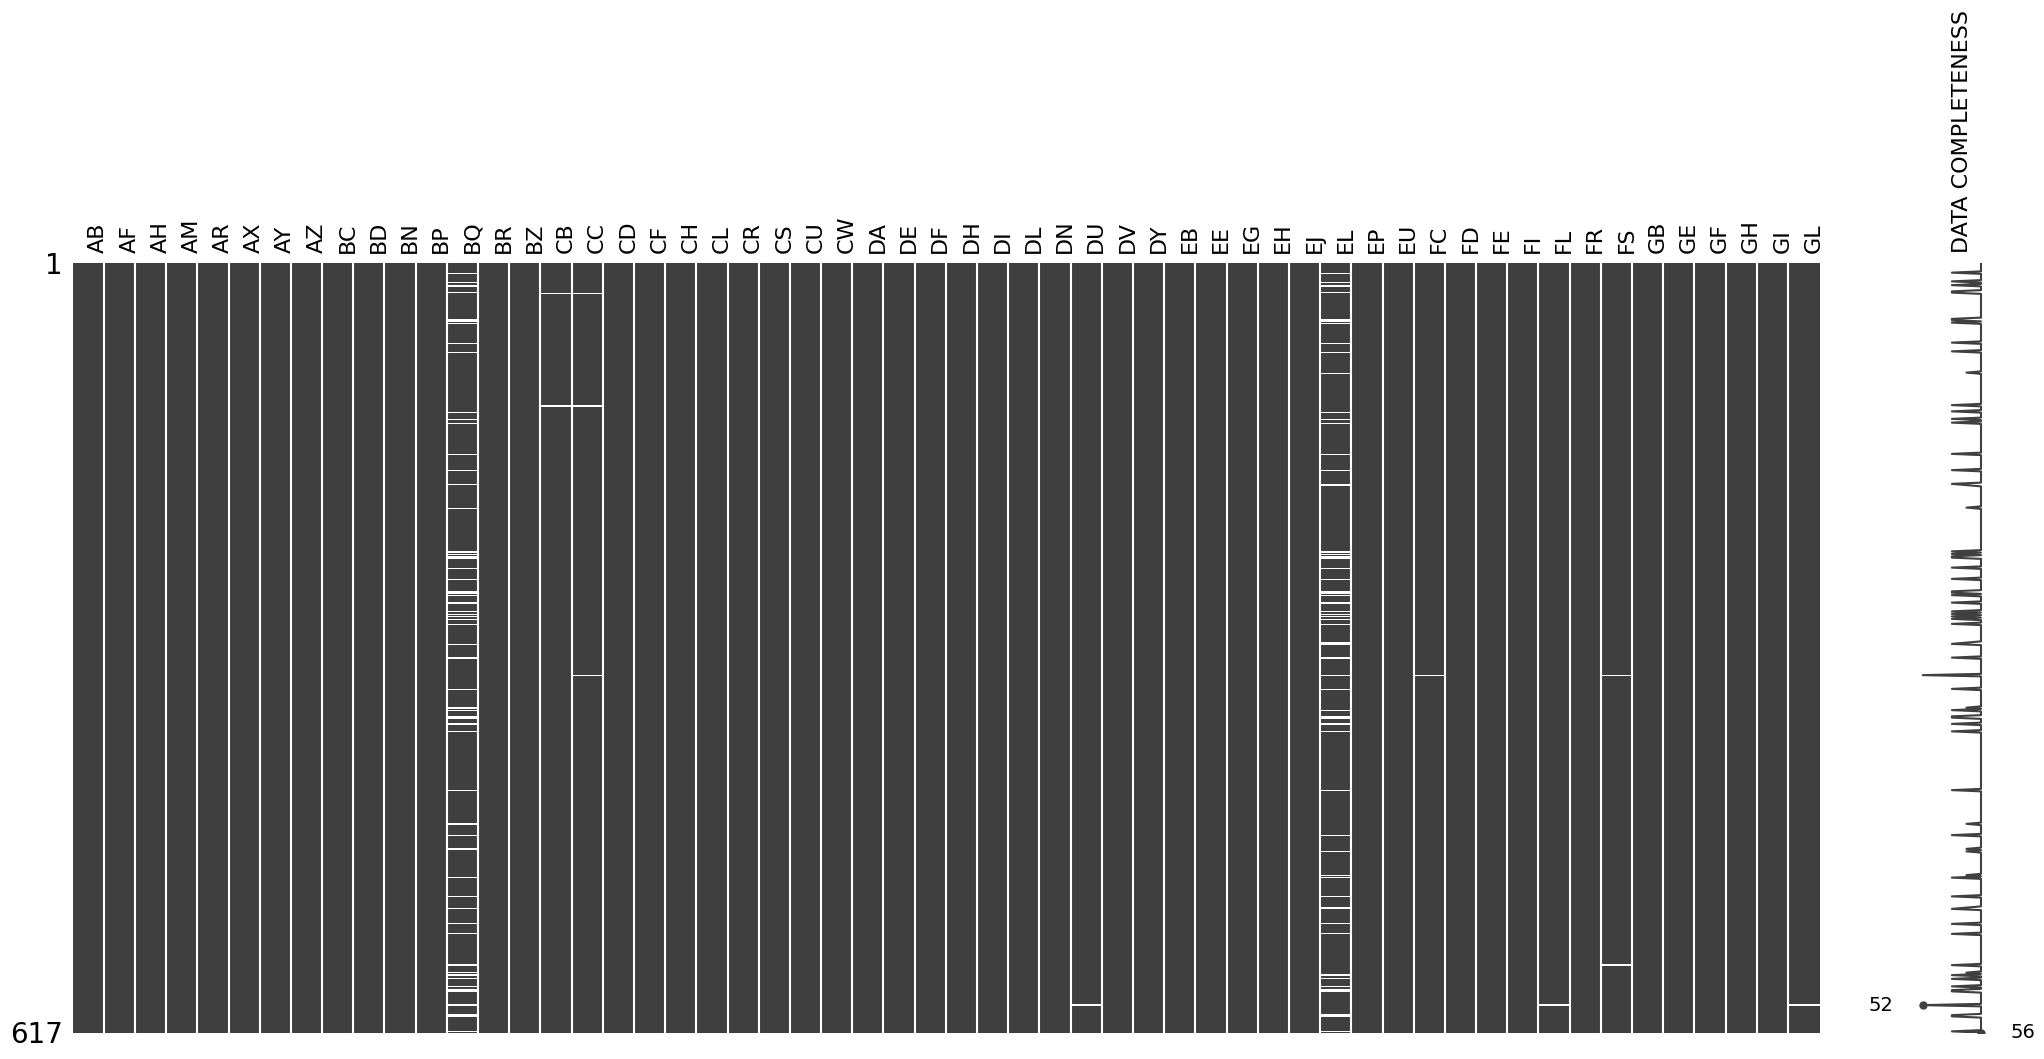

In [4]:
_ = msno.matrix(df[feature_columns], labels=feature_columns, label_rotation=90)

In [5]:
# get columns with null values
missing_cols = df[df.columns[df.isnull().any()]].isnull().sum()
missing_cols = missing_cols.sort_values(ascending=False)
missing_cols

BQ    60
EL    60
CC     3
CB     2
FS     2
DU     1
FC     1
FL     1
GL     1
dtype: int64

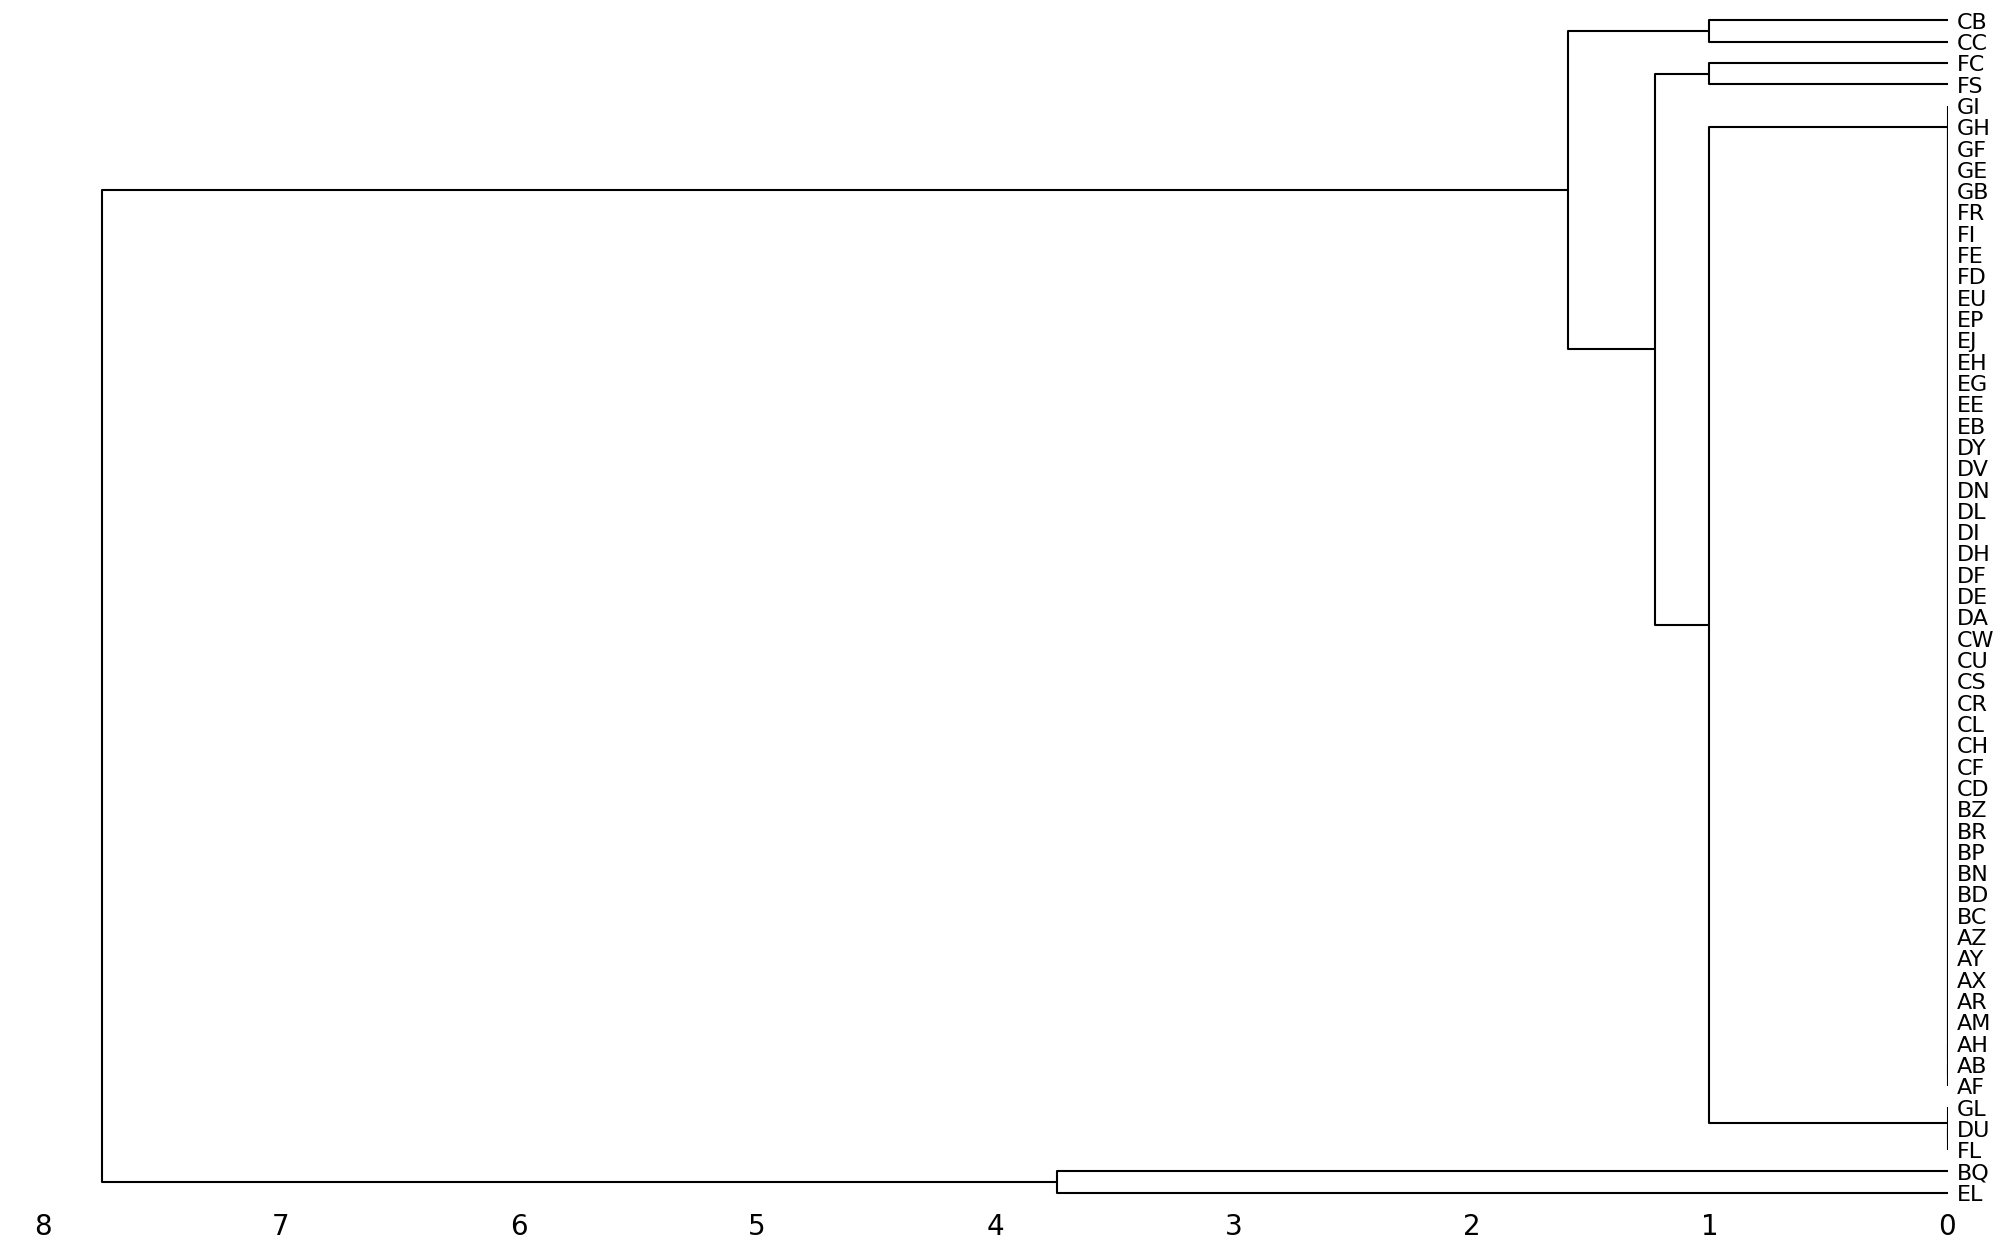

In [6]:
_ = msno.dendrogram(df[feature_columns])

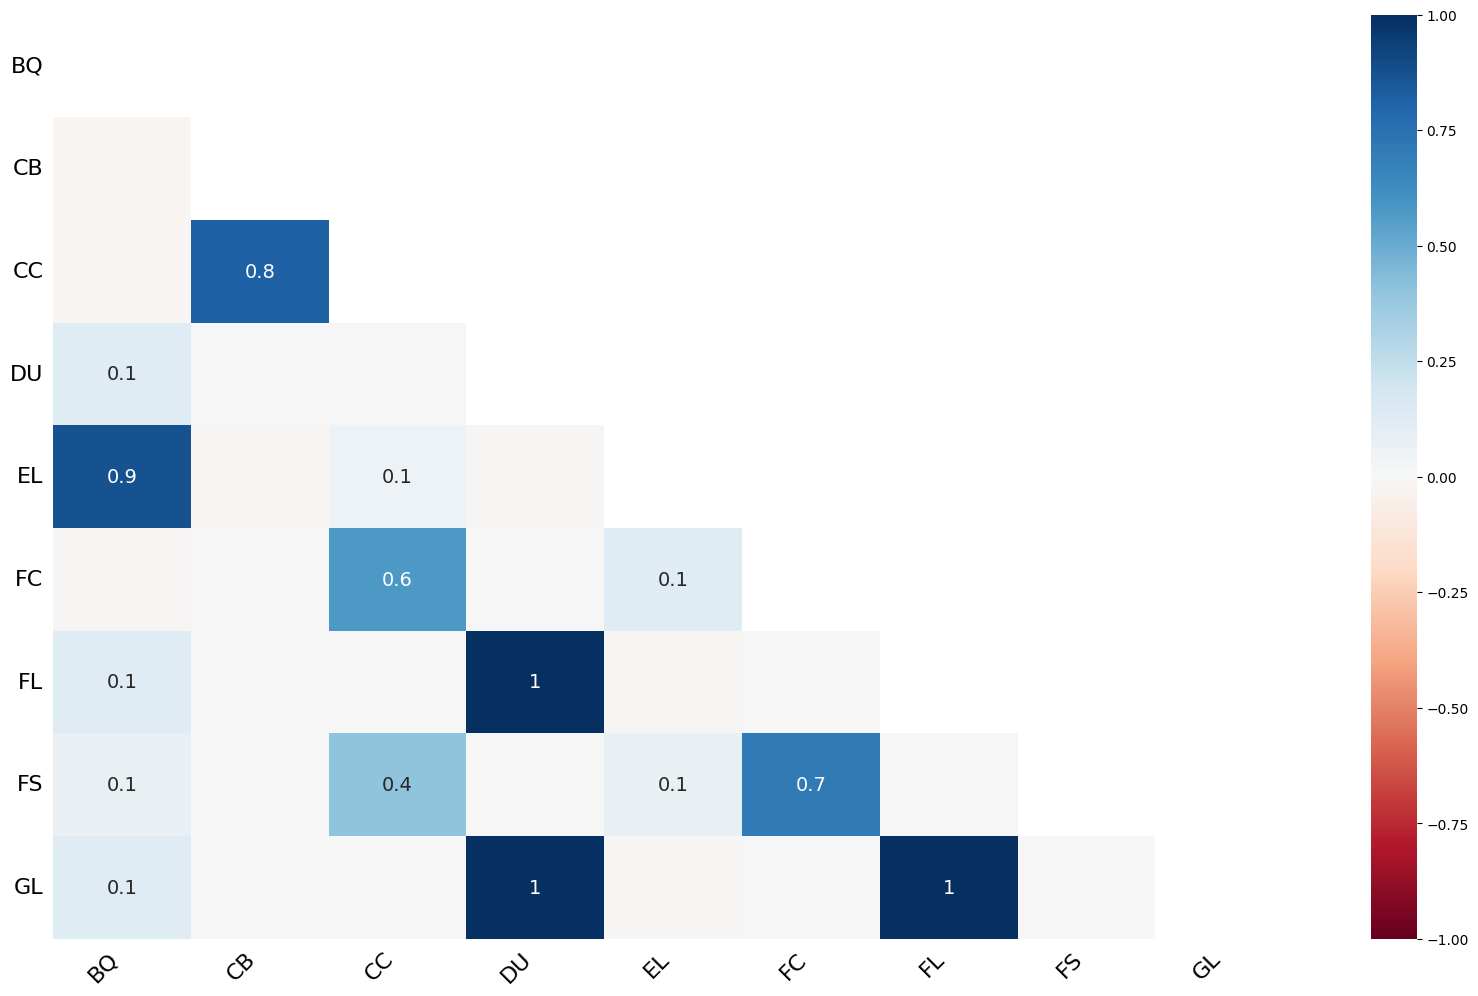

In [7]:
_ = msno.heatmap(df[feature_columns])

In [8]:
# show rows with most null values
null_columns = df.columns[df.isnull().any()].tolist() + ["Class"]
null_counts = df[null_columns].isnull().sum(axis=1)
sorted_null_counts = null_counts.sort_values(ascending=False)
df.loc[sorted_null_counts.index][null_columns].head(2)

,BQ,CB,CC,DU,EL,FC,FL,FS,GL,Class
330,344.644105,536.221322,NaN,0.005518,NaN,NaN,0.173229,NaN,21.978,1
594,NaN,27.609764,0.761854,NaN,41.967354,32.18712,NaN,0.731484,NaN,0


### Explore column BQ

In [9]:
df[["BQ"]].describe()

,BQ
count,557.000000
mean,98.328737
std,96.479371
min,1.331155
25%,27.834425
50%,61.642115
75%,134.009015
max,344.644105


In [10]:
missing_values = df["BQ"].isnull().sum()
total_values = len(df)
percentage_missing = (missing_values / total_values) * 100
print(f"Percentage of missing values in BQ: {percentage_missing:.2f}%")

Percentage of missing values in BQ: 9.72%


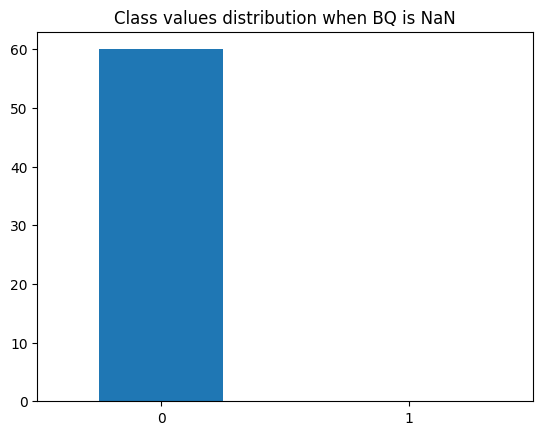

In [11]:
vc = df[df["BQ"].isnull()]["Class"].value_counts()
vc = vc.reindex([0, 1], fill_value=0)
_ = vc.plot(kind="bar", rot=0, title="Class values distribution when BQ is NaN")

0    449
1    108
Name: Class, dtype: int64


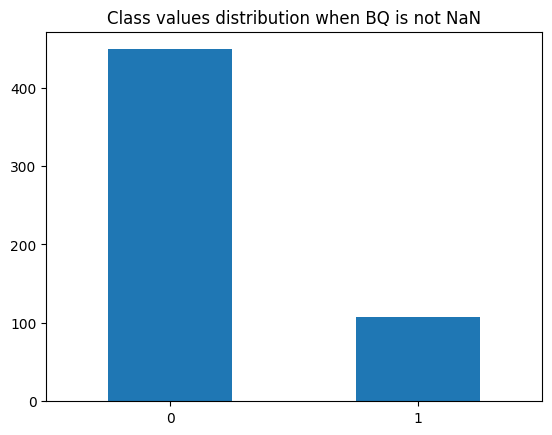

In [12]:
vc = df[df["BQ"].notnull()]["Class"].value_counts()
print(vc)
vc = vc.reindex([0, 1], fill_value=0)
_ = vc.plot(kind="bar", rot=0, title="Class values distribution when BQ is not NaN")

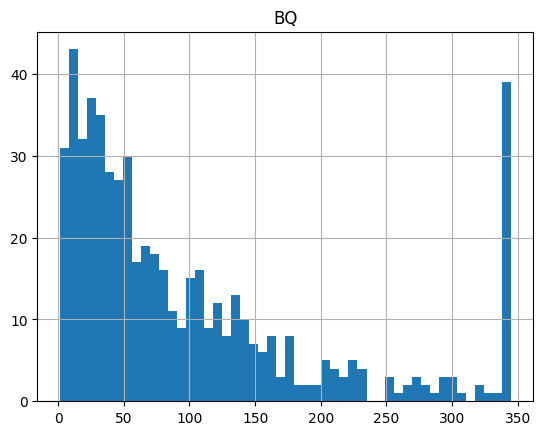

In [13]:
_ = df[["BQ"]].hist(bins=50)

0    20
1    19
Name: Class, dtype: int64


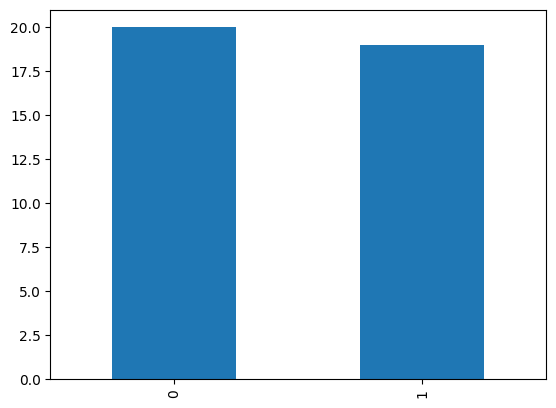

In [14]:
vc = df[df["BQ"] > 340]["Class"].value_counts()
print(vc)
_ = vc.reindex([0, 1], fill_value=0).plot(kind="bar")

## Dealing with missing values

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp = SimpleImputer(strategy="mean")

In [17]:
missing_cols = missing_cols.index.tolist()
train_df[missing_cols] = imp.fit_transform(df[missing_cols])

## PCA

In [20]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=5)

In [38]:
numerical_cols = [col for col in feature_columns if col != "EJ"]

In [39]:
pca.fit(train_df[numerical_cols])

PCA(n_components=5)

In [40]:
pca.explained_variance_ratio_.sum()

0.9908878154126372

5 principal components explain 99% of data